In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
def initialize_centroids(X, k):
    # Randomly select k unique data points as initial centroids
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    # Assign each data point to the nearest centroid
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    # Calculate new centroids as the mean of the assigned points
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

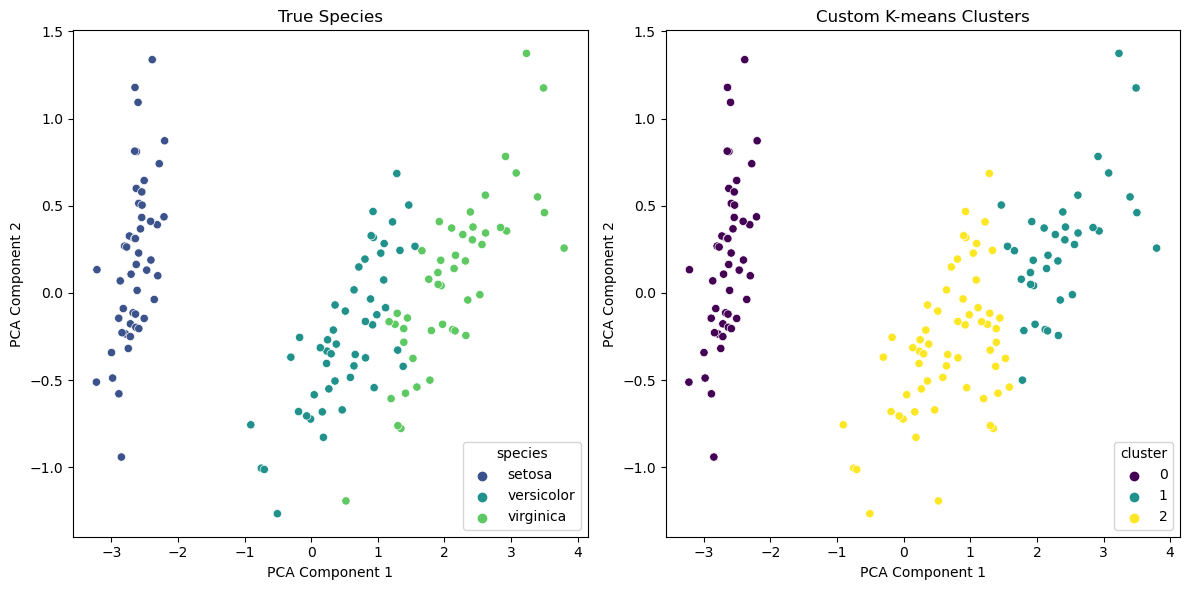

In [3]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Apply the custom k-means clustering function
k = 3
labels, centroids = k_means(X, k)

# Add the cluster labels to the DataFrame
df['cluster'] = labels

# Reduce the dimensionality of the data to 2D for visualization using PCA
pca = PCA(n_components=2)
df['pca1'] = pca.fit_transform(X)[:, 0]
df['pca2'] = pca.fit_transform(X)[:, 1]

# Plot the PCA-transformed data
plt.figure(figsize=(12, 6))

# Scatter plot of the true species
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='pca1', y='pca2', hue='species', palette='viridis')
plt.title('True Species')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Scatter plot of the custom k-means clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Custom K-means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


plt.tight_layout()
plt.show()

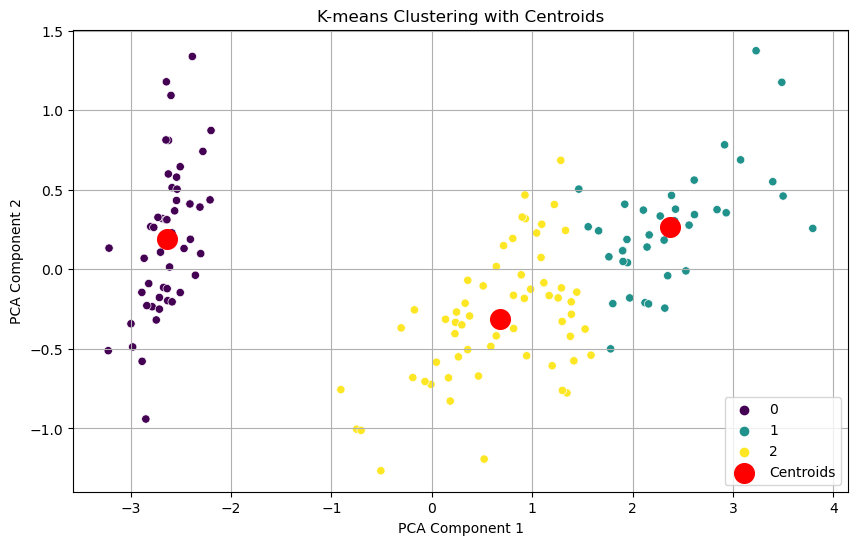

In [4]:
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# Create a DataFrame for plotting
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df['Cluster'] = labels

# Plot the clustered data points and centroids
plt.figure(figsize=(10, 6))

# Plot data points colored by cluster
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', legend='full')

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='o', s=200, c='red', label='Centroids')

plt.title('K-means Clustering with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

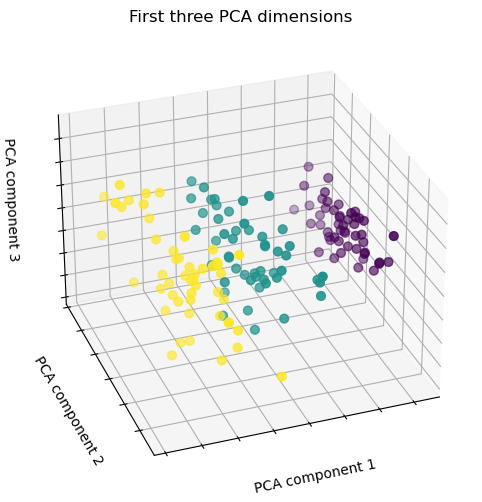

In [5]:
import mpl_toolkits.mplot3d 
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("PCA component 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("PCA component 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("PCA component 3")
ax.zaxis.set_ticklabels([])
plt.show()